In [1]:
import networkx as nx
import gudhi as gd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#Applies lower star filtration to a networkx graph G. Returns gudhi Simplex Tree data structure.
def toSimplexTree(G):
    nodes = list(G.nodes)
    edges = list(G.edges)
    filtrations = list()
    st = gd.SimplexTree()
    [
        st.insert(
            [node],
            filtration = node #assign filtration value equal to node value for each node
        )
        for node in nodes

    ]

    [
        st.insert(
            [edge[0], edge[1]],
            filtration = (max(edge[0],edge[1])) #assign filtration value for each edge
        )
        for edge in edges
    ]
    return(st) 

G: Petersen Graph
G nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
G edges: [(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)]
Petersen Graph filtration:
([0], 0.0)
([1], 1.0)
([0, 1], 1.0)
([2], 2.0)
([1, 2], 2.0)
([3], 3.0)
([2, 3], 3.0)
([4], 4.0)
([0, 4], 4.0)
([3, 4], 4.0)
([5], 5.0)
([0, 5], 5.0)
([6], 6.0)
([1, 6], 6.0)
([7], 7.0)
([2, 7], 7.0)
([5, 7], 7.0)
([8], 8.0)
([3, 8], 8.0)
([5, 8], 8.0)
([6, 8], 8.0)
([9], 9.0)
([4, 9], 9.0)
([6, 9], 9.0)
([7, 9], 9.0)


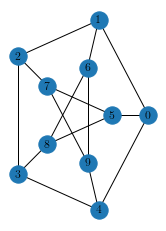

In [12]:
G = nx.petersen_graph()
print(f'''G: {G}
G nodes: {G.nodes}
G edges: {G.edges}''')
PetersenST = toSimplexTree(G)

L = PetersenST.get_filtration()
print("Petersen Graph filtration:")
for splx in L:
    print(splx)
 
nx.draw(G)
# plt.subplot(121)
# nx.draw(G, with_labels=True, font_weight='bold')

plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

[(0, (0.0, inf))]


C:\Users\Sam\anaconda3\lib\site-packages\gudhi\persistence_graphical_tools.py:369: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  axes.axis([axis_start, axis_end, axis_start, infinity + delta/2])
C:\Users\Sam\anaconda3\lib\site-packages\gudhi\persistence_graphical_tools.py:369: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes.axis([axis_start, axis_end, axis_start, infinity + delta/2])
C:\Users\Sam\anaconda3\lib\site-packages\gudhi\persistence_graphical_tools.py:210: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  axes.axis([axis_start, infinity, 0, ind])


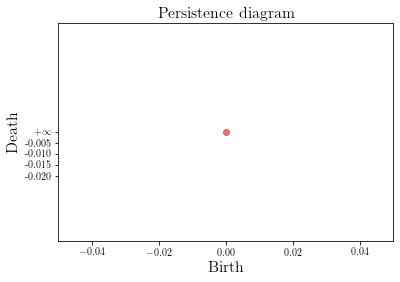

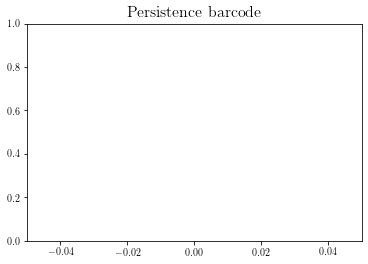

In [13]:
#To compute the persistence diagram of the filtered simplex
diagST=PetersenST.persistence(homology_coeff_field=2)
print(diagST)
#To plot a persistence diagram - it doesn't go well
gd.plot_persistence_diagram(diagST)
gd.plot_persistence_barcode(diagST)
plt.show()

In [14]:
#The following is an example I pulled from p2-3 of https://geometrica.saclay.inria.fr/team/Fred.Chazal/slides/TP1.pdf
#It seems to produce better diagrams
#Also try running this skipping the kernel below - still creates a meaningful diagram, and the simplex is now a graph

st = gd.SimplexTree() #Create a simplex tree
#Simplices can be inserted one by one
#Vertices are indexed by integers
if st.insert([0,1]):
    print("first simplex inserted!")
st.insert([1,2])
st.insert([2,3])
st.insert([3,0])
st.insert([0,2])
st.insert([3,1])
L = st.get_filtration() #Get a list with all the simplices
#Notice that inserting an edge automatically insert its vertices (if they were
#not already in the complex)
for splx in L:
    print(splx)

first simplex inserted!
([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)


In [15]:
#insert the 2-skeleton giving some filtration values to the faces
st.insert([0,1,2],filtration=0.1)
st.insert([1,2,3],filtration=0.2)
st.insert([0,2,3],filtration=0.3)
st.insert([0,1,3],filtration=0.4)
#if you add a new simplex with a given filtration values, all its faces that
#were not in the complex before are added with the same filtration value
#st.insert([2,3,4],filtration=0.7)
L = st.get_filtration()
for splx in L:
    print(splx)

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)
([0, 1, 2], 0.1)
([1, 2, 3], 0.2)
([0, 2, 3], 0.3)
([0, 1, 3], 0.4)


[(1, (0.0, 0.3)), (1, (0.0, 0.2)), (1, (0.0, 0.1)), (0, (0.0, inf))]


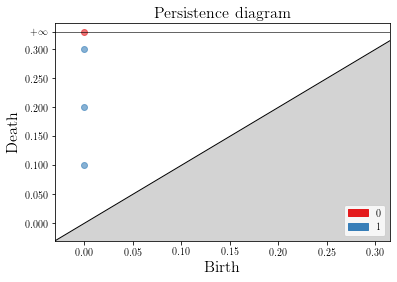

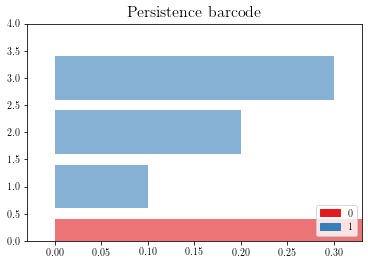

In [16]:
#To compute the persistence diagram of the filtered simplex
diag=st.persistence()
print(diag)
#To plot a persistence diagram
gd.plot_persistence_diagram(diag,legend=True)
gd.plot_persistence_barcode(diag,legend=True)
plt.show()

([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([0, 1], 1.0)
([0, 2], 1.0)
([1, 2], 1.0)
([0, 3], 1.0)
([1, 3], 1.0)
([2, 3], 1.0)
([0, 1, 2], 2.0)
([0, 1, 3], 2.0)
([0, 2, 3], 2.0)
([1, 2, 3], 2.0)
[(1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (0, (0.0, inf)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]


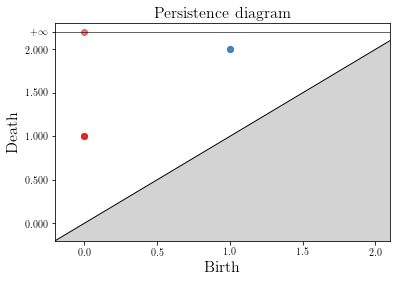

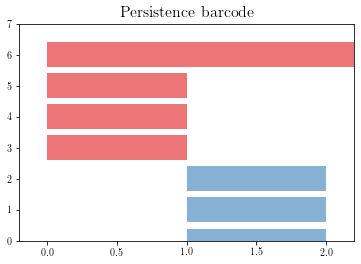

In [17]:
st2 = gd.SimplexTree() #The new filtered complex
L = st.get_filtration()

for splx in L:
#We assign to each simplex its dimension as filtration value
    st2.insert(splx[0],filtration=len(splx[0])-1.0)

L = st2.get_filtration()
for splx in L:
    print(splx)
    
#To compute the persistence diagram of the filtered simplex
diag2=st2.persistence()
print(diag2)

#To plot a persistence diagram
gd.plot_persistence_diagram(diag2)
gd.plot_persistence_barcode(diag2)